In [2]:
import pandas as pd
import numpy as np

import os,cv2
import matplotlib.pyplot as plt

%matplotlib inline

# 讀取檔案裡的圖片

In [157]:
array_of_img = [] 
array_of_name = []

def read_directory(directory_name):

    for filename in os.listdir(directory_name):

        img = cv2.imread(directory_name + "/" + filename)
    
        array_of_img.append(img)
        array_of_name.append(filename)  
        
read_directory("C:/Users/tsaiy/MyPython/AIMango/C2_TrainDev/Dev")

In [158]:
df = pd.DataFrame([])

m1 = pd.DataFrame(array_of_name, columns=['imageID'])
m2 = pd.DataFrame(array_of_img, columns=['ORIGINAL'])

df = pd.concat([m1,m2],axis=1)
df

,imageID,ORIGINAL
0,00002.jpg,"[[[67, 62, 59], [66, 61, 58], [66, 61, 58], [6..."
1,00003.jpg,"[[[63, 53, 46], [63, 53, 46], [63, 53, 46], [6..."
2,00004.jpg,"[[[249, 251, 251], [249, 251, 251], [249, 251,..."
3,00022.jpg,"[[[33, 54, 15], [43, 64, 25], [57, 81, 41], [6..."
4,00030.jpg,"[[[66, 57, 54], [66, 57, 54], [66, 57, 54], [6..."
...,...,...
3676,49987.jpg,"[[[115, 117, 117], [115, 117, 117], [115, 117,..."
3677,49988.jpg,"[[[96, 92, 91], [95, 91, 90], [95, 91, 90], [9..."
3678,49989.jpg,"[[[145, 136, 139], [127, 118, 121], [117, 108,..."
3679,49993.jpg,"[[[139, 163, 99], [140, 164, 100], [142, 166, ..."


# 匯入label
1. 處理一圖多缺陷問題，一張圖可能有15個缺陷處，Dev裡的圖總共有6280個缺陷處
2. 將不良類別改為數值資料(0,1,2,3,4)
3. 將圖片與label合併

In [159]:
label = pd.read_csv('C:/Users/tsaiy/MyPython/AIMango/C2_TrainDev/dev.csv', header = None)

#1
temp = pd.DataFrame([])
name = label.iloc[:,[0]]

for i in range(1,76,5):
    pos = label.iloc[:, i:i+5] #缺陷位置
    merge = pd.concat([name, pos], axis = 1) #將缺陷的位置與圖片名稱合併
    
    temp = temp.append(merge.T.reset_index(drop=True).T) #將column name重設才好合併

label = temp.dropna()
label = label.reset_index(drop = True)

label = label.rename(columns={0: "imageID", 
                              1: "x",
                              2: "y",
                              3: "w",
                              4: "h",
                              5: "cat"})

#2
for i in range(len(label)):
    #將cat改成0,1,2
    if label.loc[i,'cat'] =="不良-著色不佳":
        label.loc[i,'cat'] = 0
    elif label.loc[i,'cat'] =="不良-炭疽病":
        label.loc[i,'cat'] = 1
    elif label.loc[i,'cat'] =="不良-乳汁吸附":
        label.loc[i,'cat'] = 2
    elif label.loc[i,'cat'] =="不良-黑斑病":
        label.loc[i,'cat'] = 3
    else:
        label.loc[i,'cat'] = 4  #"不良-機械傷害"

#3
df = pd.merge(label, df, on='imageID')
df

,imageID,x,y,w,h,cat,ORIGINAL
0,26519.jpg,559,772,233,413,4,"[[[124, 124, 84], [124, 124, 84], [125, 125, 8..."
1,26519.jpg,848,539,102,231,1,"[[[124, 124, 84], [124, 124, 84], [125, 125, 8..."
2,26519.jpg,615,491,85,141,1,"[[[124, 124, 84], [124, 124, 84], [125, 125, 8..."
3,39995.jpg,376,481,103,88,4,"[[[6, 9, 7], [6, 9, 7], [6, 9, 7], [6, 9, 7], ..."
4,39995.jpg,615,612,46,32,1,"[[[6, 9, 7], [6, 9, 7], [6, 9, 7], [6, 9, 7], ..."
...,...,...,...,...,...,...,...
6275,37653.jpg,140,553,873,876,0,"[[[84, 105, 96], [85, 106, 97], [88, 109, 100]..."
6276,37653.jpg,873,716,89,131,1,"[[[84, 105, 96], [85, 106, 97], [88, 109, 100]..."
6277,37653.jpg,890,598,28,80,1,"[[[84, 105, 96], [85, 106, 97], [88, 109, 100]..."
6278,27894.jpg,960,693,67,57,1,"[[[6, 8, 8], [6, 8, 8], [6, 8, 8], [6, 8, 8], ..."


# 確認各個不良特徵的個數

著色不佳共1997筆
炭疽病共3504筆
乳汁吸附共391筆
黑斑病共298筆
機械傷害共90筆


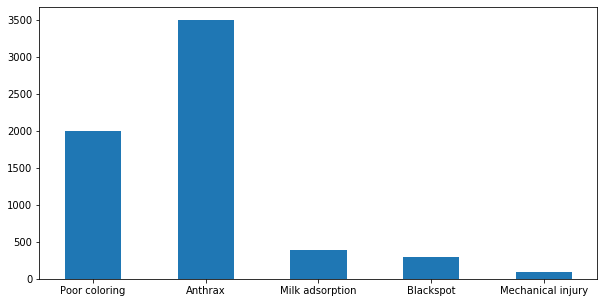

In [183]:
print("著色不佳共{}筆".format(len(df[df['cat'] == 0])))
print("炭疽病共{}筆".format(len(df[df['cat'] == 1])))
print("乳汁吸附共{}筆".format(len(df[df['cat'] == 2])))
print("黑斑病共{}筆".format(len(df[df['cat'] == 3])))
print("機械傷害共{}筆".format(len(df[df['cat'] == 4])))

fig, axs = plt.subplots(1, figsize = (10,5))
plt.bar(x = ['Poor coloring','Anthrax','Milk adsorption','Blackspot','Mechanical injury'],
        height = [len(df[df['cat'] == 0]),len(df[df['cat'] == 1]),len(df[df['cat'] == 2]),len(df[df['cat'] == 3]),len(df[df['cat'] == 4])],
        width = 0.5)
plt.show()

# 裁切不良缺陷處的image，命名為crop
1. 注意要進行裁切前，x,y,w,h必須是int

In [167]:
#將資料轉為int
df[["x", "y", "w", "h"]] = df[["x", "y", "w", "h"]].apply(pd.to_numeric)

array_of_crop = []

for i in range(len(df)):
    
    # 裁切區域的長度、寬度與位置
    x = df.loc[i,'x']
    y = df.loc[i,'y']
    w = df.loc[i,'w']
    h = df.loc[i,'h']

    # 裁切圖片
    crop = df.loc[i,'ORIGINAL'][y:y+h, x:x+w]
    array_of_crop.append(crop)
    
df['crop'] = array_of_crop
df

,imageID,x,y,w,h,cat,ORIGINAL,crop
0,26519.jpg,559,772,233,413,4,"[[[124, 124, 84], [124, 124, 84], [125, 125, 8...","[[[25, 38, 130], [22, 37, 129], [23, 38, 130],..."
1,26519.jpg,848,539,102,231,1,"[[[124, 124, 84], [124, 124, 84], [125, 125, 8...","[[[84, 120, 220], [83, 119, 219], [83, 118, 22..."
2,26519.jpg,615,491,85,141,1,"[[[124, 124, 84], [124, 124, 84], [125, 125, 8...","[[[89, 108, 213], [90, 109, 214], [89, 108, 21..."
3,39995.jpg,376,481,103,88,4,"[[[6, 9, 7], [6, 9, 7], [6, 9, 7], [6, 9, 7], ...","[[[65, 108, 189], [60, 103, 184], [58, 98, 180..."
4,39995.jpg,615,612,46,32,1,"[[[6, 9, 7], [6, 9, 7], [6, 9, 7], [6, 9, 7], ...","[[[91, 116, 190], [97, 122, 194], [91, 117, 18..."
...,...,...,...,...,...,...,...,...
6275,37653.jpg,140,553,873,876,0,"[[[84, 105, 96], [85, 106, 97], [88, 109, 100]...","[[[157, 147, 193], [157, 147, 193], [156, 146,..."
6276,37653.jpg,873,716,89,131,1,"[[[84, 105, 96], [85, 106, 97], [88, 109, 100]...","[[[114, 134, 243], [113, 133, 244], [113, 133,..."
6277,37653.jpg,890,598,28,80,1,"[[[84, 105, 96], [85, 106, 97], [88, 109, 100]...","[[[125, 133, 255], [125, 133, 255], [124, 132,..."
6278,27894.jpg,960,693,67,57,1,"[[[6, 8, 8], [6, 8, 8], [6, 8, 8], [6, 8, 8], ...","[[[123, 198, 254], [121, 199, 252], [121, 199,..."


# original和crop圖片前處理
1. 取出RGB值
2. 轉成灰階
3. 轉成二元圖

### 取出RGB

In [194]:
original_r = []
original_g = []
original_b = []

crop_r = []
crop_g = []
crop_b = []

for i in range(len(df['ORIGINAL'])):

    #讀取RGB平均值
    channels_o = cv2.mean(df['ORIGINAL'][i])  #original
    channels_c = cv2.mean(df['crop'][i])  #crop
        
    #original   
    original_r.append(np.array(channels_o[2])) #red
    original_g.append(np.array(channels_o[1])) #green
    original_b.append(np.array(channels_o[0])) #blue
    #crop
    crop_r.append(np.array(channels_c[2])) #red
    crop_g.append(np.array(channels_c[1])) #green
    crop_b.append(np.array(channels_c[2])) #blue

In [195]:
len(original_r)

6280

### 轉成灰階圖

In [196]:
original_gray = []
crop_gray = []

for i in range(len(df['ORIGINAL'])):
    original_gray.append(cv2.cvtColor(df['ORIGINAL'][i], cv2.COLOR_BGR2GRAY)) #original
    crop_gray.append(cv2.cvtColor(df['crop'][i], cv2.COLOR_BGR2GRAY)) #crop

In [197]:
len(crop_gray)

6280

### 轉成二元圖

In [198]:
original_binary = []
crop_binary = []

for i in range(len(original_gray)):
    original_binary.append(cv2.threshold(original_gray[i],127,255,cv2.THRESH_BINARY)[1]) #original
    crop_binary.append(cv2.threshold(crop_gray[i],127,255,cv2.THRESH_BINARY)[1]) #crop

# 將RGB,二元圖,灰階合併入df

In [199]:
df['ori_R'] = original_r
df['ori_G'] = original_g
df['ori_B'] = original_b

df['crop_R'] = crop_r
df['crop_G'] = crop_g
df['crop_B'] = crop_b

df['ori_gray'] = original_gray
df['ori_binary'] = original_binary

df['crop_gray'] = original_gray
df['crop_binary'] = original_binary
df

,imageID,x,y,w,h,cat,ORIGINAL,crop,ori_R,ori_G,ori_B,crop_R,crop_G,crop_B,ori_gray,ori_binary,crop_gray,crop_binary
0,26519.jpg,559,772,233,413,4,"[[[124, 124, 84], [124, 124, 84], [125, 125, 8...","[[[25, 38, 130], [22, 37, 129], [23, 38, 130],...",123.14716480396412,80.65150508174189,65.369711416739,141.02312192790114,62.370148292094896,141.02312192790114,"[[112, 112, 113, 114, 114, 115, 116, 116, 117,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[112, 112, 113, 114, 114, 115, 116, 116, 117,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,26519.jpg,848,539,102,231,1,"[[[124, 124, 84], [124, 124, 84], [125, 125, 8...","[[[84, 120, 220], [83, 119, 219], [83, 118, 22...",123.14716480396412,80.65150508174189,65.369711416739,183.27616501145914,85.63954672778202,183.27616501145914,"[[112, 112, 113, 114, 114, 115, 116, 116, 117,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[112, 112, 113, 114, 114, 115, 116, 116, 117,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,26519.jpg,615,491,85,141,1,"[[[124, 124, 84], [124, 124, 84], [125, 125, 8...","[[[89, 108, 213], [90, 109, 214], [89, 108, 21...",123.14716480396412,80.65150508174189,65.369711416739,188.39766374634962,95.56236962870256,188.39766374634962,"[[112, 112, 113, 114, 114, 115, 116, 116, 117,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[112, 112, 113, 114, 114, 115, 116, 116, 117,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,39995.jpg,376,481,103,88,4,"[[[6, 9, 7], [6, 9, 7], [6, 9, 7], [6, 9, 7], ...","[[[65, 108, 189], [60, 103, 184], [58, 98, 180...",148.64121329955594,90.75637533659297,68.56668748228458,140.37157987643425,81.88073698146513,140.37157987643425,"[[8, 8, 8, 8, 8, 7, 5, 5, 11, 6, 1, 1, 6, 10, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[8, 8, 8, 8, 8, 7, 5, 5, 11, 6, 1, 1, 6, 10, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,39995.jpg,615,612,46,32,1,"[[[6, 9, 7], [6, 9, 7], [6, 9, 7], [6, 9, 7], ...","[[[91, 116, 190], [97, 122, 194], [91, 117, 18...",148.64121329955594,90.75637533659297,68.56668748228458,159.91508152173913,101.328125,159.91508152173913,"[[8, 8, 8, 8, 8, 7, 5, 5, 11, 6, 1, 1, 6, 10, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[8, 8, 8, 8, 8, 7, 5, 5, 11, 6, 1, 1, 6, 10, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6275,37653.jpg,140,553,873,876,0,"[[[84, 105, 96], [85, 106, 97], [88, 109, 100]...","[[[157, 147, 193], [157, 147, 193], [156, 146,...",133.17574451587816,82.35210446958189,71.74543253580728,168.1128554765753,82.47948343768144,168.1128554765753,"[[100, 101, 104, 106, 106, 106, 104, 104, 105,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[100, 101, 104, 106, 106, 106, 104, 104, 105,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
6276,37653.jpg,873,716,89,131,1,"[[[84, 105, 96], [85, 106, 97], [88, 109, 100]...","[[[114, 134, 243], [113, 133, 244], [113, 133,...",133.17574451587816,82.35210446958189,71.74543253580728,238.5463590359379,129.5643708722875,238.5463590359379,"[[100, 101, 104, 106, 106, 106, 104, 104, 105,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[100, 101, 104, 106, 106, 106, 104, 104, 105,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
6277,37653.jpg,890,598,28,80,1,"[[[84, 105, 96], [85, 106, 97], [88, 109, 100]...","[[[125, 133, 255], [125, 133, 255], [124, 132,...",133.17574451587816,82.35210446958189,71.74543253580728,246.37857142857143,128.95,246.37857142857143,"[[100, 101, 104, 106, 106, 106, 104, 104, 105,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[100, 101, 104, 106, 106, 106, 104, 104, 105,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
6278,27894.jpg,960,693,67,57,1,"[[[6, 8, 8], [6, 8, 8], [6, 8, 8], [6, 8, 8], ...","[[[123, 198, 254], [121, 199, 252], [121, 199,...",124.11729526880197,95.31391723356009,96.1342969045257,247.92354019376802,1

# Haralicks Feature(original & crop)
1. ori_gray
2. crop_gray
3. 跑很久，按下去前請三思

### 提取original的Hara特徵 

In [200]:
import mahotas

array_of_ASM = [] #Angular Second Moment
array_of_Cons = [] #Contrast
array_of_Corr = [] #Correlation
array_of_Var = [] #Sum of Squares: Variance

array_of_IDM = [] #Inverse Diference Moment
array_of_SAv = [] #Sum Average
array_of_SVar = [] #Sum Variance
array_of_SEnt = [] #Sum Entropy

array_of_Ent = [] #Entropy
array_of_DVar = [] #Diference Variance
array_of_DEnt = [] #Difference Entropy
array_of_IMC1 = [] #Information Measures of Correlation 1
array_of_IMC2 = [] #Information Measures of Correlation 2



for i in range(len(df)):
    h = mahotas.features.haralick(df.loc[i,'ori_gray']) #4個矩陣代表了4個方向
    hara =  h.mean(axis = 0)#取四個矩陣的平均值以壓縮其維度，作為其features
    
    array_of_ASM.append(hara[0])
    array_of_Cons.append(hara[1])
    array_of_Corr.append(hara[2])
    
    array_of_Var.append(hara[3])
    array_of_IDM.append(hara[4])
    array_of_SAv.append(hara[5])
    
    array_of_SVar.append(hara[6])
    array_of_SEnt.append(hara[7])
    array_of_Ent.append(hara[8])
    array_of_DVar.append(hara[9])
    array_of_DEnt.append(hara[10])
    
    array_of_IMC1.append(hara[11])
    array_of_IMC2.append(hara[12])
    
df['ori_ASM'] = array_of_ASM
df['ori_Cons'] = array_of_Cons
df['ori_Corr'] = array_of_Corr
df['ori_Var'] = array_of_Var
df['ori_IDM'] = array_of_IDM
df['ori_SAv'] = array_of_SAv
df['ori_SVar'] = array_of_SVar
df['ori_SEnt'] = array_of_SEnt
df['ori_Ent'] = array_of_Ent
df['ori_DVar'] = array_of_DVar
df['ori_DEnt'] = array_of_DEnt
df['ori_IMC1'] = array_of_IMC1
df['ori_IMC2'] = array_of_IMC2

df

,imageID,x,y,w,h,cat,ORIGINAL,crop,ori_R,ori_G,...,ori_Var,ori_IDM,ori_SAv,ori_SVar,ori_SEnt,ori_Ent,ori_DVar,ori_DEnt,ori_IMC1,ori_IMC2
0,26519.jpg,559,772,233,413,4,"[[[124, 124, 84], [124, 124, 84], [125, 125, 8...","[[[25, 38, 130], [22, 37, 129], [23, 38, 130],...",123.14716480396412,80.65150508174189,...,2841.827435,0.502730,183.237781,11356.375311,8.579580,10.817995,0.000870,2.603606,-0.577899,0.999916
1,26519.jpg,848,539,102,231,1,"[[[124, 124, 84], [124, 124, 84], [125, 125, 8...","[[[84, 120, 220], [83, 119, 219], [83, 118, 22...",123.14716480396412,80.65150508174189,...,2841.827435,0.502730,183.237781,11356.375311,8.579580,10.817995,0.000870,2.603606,-0.577899,0.999916
2,26519.jpg,615,491,85,141,1,"[[[124, 124, 84], [124, 124, 84], [125, 125, 8...","[[[89, 108, 213], [90, 109, 214], [89, 108, 21...",123.14716480396412,80.65150508174189,...,2841.827435,0.502730,183.237781,11356.375311,8.579580,10.817995,0.000870,2.603606,-0.577899,0.999916
3,39995.jpg,376,481,103,88,4,"[[[6, 9, 7], [6, 9, 7], [6, 9, 7], [6, 9, 7], ...","[[[65, 108, 189], [60, 103, 184], [58, 98, 180...",148.64121329955594,90.75637533659297,...,1987.532477,0.356041,211.139941,7913.717614,8.308323,11.323231,0.000572,3.289006,-0.452437,0.999267
4,39995.jpg,615,612,46,32,1,"[[[6, 9, 7], [6, 9, 7], [6, 9, 7], [6, 9, 7], ...","[[[91, 116, 190], [97, 122, 194], [91, 117, 18...",148.64121329955594,90.75637533659297,...,1987.532477,0.356041,211.139941,7913.717614,8.308323,11.323231,0.000572,3.289006,-0.452437,0.999267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6275,37653.jpg,140,553,873,876,0,"[[[84, 105, 96], [85, 106, 97], [88, 109, 100]...","[[[157, 147, 193], [157, 147, 193], [156, 146,...",133.17574451587816,82.35210446958189,...,2772.354079,0.435764,192.709105,11075.482992,8.503315,11.001444,0.000765,2.770887,-0.535043,0.999822
6276,37653.jpg,873,716,89,131,1,"[[[84, 105, 96], [85, 106, 97], [88, 109, 100]...","[[[114, 134, 243], [113, 133, 244], [113, 133,...",133.17574451587816,82.35210446958189,...,2772.354079,0.435764,192.709105,11075.482992,8.503315,11.001444,0.000765,2.770887,-0.535043,0.999822
6277,37653.jpg,890,598,28,80,1,"[[[84, 105, 96], [85, 106, 97], [88, 109, 100]...","[[[125, 133, 255], [125, 133, 255], [124, 132,...",133.17574451587816,82.35210446958189,...,2772.354079,0.435764,192.709105,11075.482992,8.503315,11.001444,0.000765,2.770887,-0.535043,0.999822
6278,27894.jpg,960,693,67,57,1,"[[[6, 8, 8], [6, 8, 8], [6, 8, 8], [6, 8, 8], ...","[[[123, 198, 254], [121, 199, 252], [121, 199,...",124.11729526880197,95.31391723356009,...,3828.893386,0.457454,208.060264,15160.125038,8.721709,11.750969,0.000683,3.458921,-0.483626,0.999661


### 提取crop的Hara特徵 

In [201]:
array_of_ASM = [] #Angular Second Moment
array_of_Cons = [] #Contrast
array_of_Corr = [] #Correlation
array_of_Var = [] #Sum of Squares: Variance

array_of_IDM = [] #Inverse Diference Moment
array_of_SAv = [] #Sum Average
array_of_SVar = [] #Sum Variance
array_of_SEnt = [] #Sum Entropy

array_of_Ent = [] #Entropy
array_of_DVar = [] #Diference Variance
array_of_DEnt = [] #Difference Entropy
array_of_IMC1 = [] #Information Measures of Correlation 1
array_of_IMC2 = [] #Information Measures of Correlation 2

for i in range(len(df)):
    h = mahotas.features.haralick(df.loc[i,'crop_gray']) #4個矩陣代表了4個方向
    hara =  h.mean(axis = 0)#取四個矩陣的平均值以壓縮其維度，作為其features
    
    array_of_ASM.append(hara[0])
    array_of_Cons.append(hara[1])
    array_of_Corr.append(hara[2])
    
    array_of_Var.append(hara[3])
    array_of_IDM.append(hara[4])
    array_of_SAv.append(hara[5])
    
    array_of_SVar.append(hara[6])
    array_of_SEnt.append(hara[7])
    array_of_Ent.append(hara[8])
    array_of_DVar.append(hara[9])
    array_of_DEnt.append(hara[10])
    
    array_of_IMC1.append(hara[11])
    array_of_IMC2.append(hara[12])
    
df['crop_ASM'] = array_of_ASM
df['crop_Cons'] = array_of_Cons
df['crop_Corr'] = array_of_Corr
df['crop_Var'] = array_of_Var
df['crop_IDM'] = array_of_IDM
df['crop_SAv'] = array_of_SAv
df['crop_SVar'] = array_of_SVar
df['crop_SEnt'] = array_of_SEnt
df['crop_Ent'] = array_of_Ent
df['crop_DVar'] = array_of_DVar
df['crop_DEnt'] = array_of_DEnt
df['crop_IMC1'] = array_of_IMC1
df['crop_IMC2'] = array_of_IMC2

df

,imageID,x,y,w,h,cat,ORIGINAL,crop,ori_R,ori_G,...,crop_Var,crop_IDM,crop_SAv,crop_SVar,crop_SEnt,crop_Ent,crop_DVar,crop_DEnt,crop_IMC1,crop_IMC2
0,26519.jpg,559,772,233,413,4,"[[[124, 124, 84], [124, 124, 84], [125, 125, 8...","[[[25, 38, 130], [22, 37, 129], [23, 38, 130],...",123.14716480396412,80.65150508174189,...,2841.827435,0.502730,183.237781,11356.375311,8.579580,10.817995,0.000870,2.603606,-0.577899,0.999916
1,26519.jpg,848,539,102,231,1,"[[[124, 124, 84], [124, 124, 84], [125, 125, 8...","[[[84, 120, 220], [83, 119, 219], [83, 118, 22...",123.14716480396412,80.65150508174189,...,2841.827435,0.502730,183.237781,11356.375311,8.579580,10.817995,0.000870,2.603606,-0.577899,0.999916
2,26519.jpg,615,491,85,141,1,"[[[124, 124, 84], [124, 124, 84], [125, 125, 8...","[[[89, 108, 213], [90, 109, 214], [89, 108, 21...",123.14716480396412,80.65150508174189,...,2841.827435,0.502730,183.237781,11356.375311,8.579580,10.817995,0.000870,2.603606,-0.577899,0.999916
3,39995.jpg,376,481,103,88,4,"[[[6, 9, 7], [6, 9, 7], [6, 9, 7], [6, 9, 7], ...","[[[65, 108, 189], [60, 103, 184], [58, 98, 180...",148.64121329955594,90.75637533659297,...,1987.532477,0.356041,211.139941,7913.717614,8.308323,11.323231,0.000572,3.289006,-0.452437,0.999267
4,39995.jpg,615,612,46,32,1,"[[[6, 9, 7], [6, 9, 7], [6, 9, 7], [6, 9, 7], ...","[[[91, 116, 190], [97, 122, 194], [91, 117, 18...",148.64121329955594,90.75637533659297,...,1987.532477,0.356041,211.139941,7913.717614,8.308323,11.323231,0.000572,3.289006,-0.452437,0.999267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6275,37653.jpg,140,553,873,876,0,"[[[84, 105, 96], [85, 106, 97], [88, 109, 100]...","[[[157, 147, 193], [157, 147, 193], [156, 146,...",133.17574451587816,82.35210446958189,...,2772.354079,0.435764,192.709105,11075.482992,8.503315,11.001444,0.000765,2.770887,-0.535043,0.999822
6276,37653.jpg,873,716,89,131,1,"[[[84, 105, 96], [85, 106, 97], [88, 109, 100]...","[[[114, 134, 243], [113, 133, 244], [113, 133,...",133.17574451587816,82.35210446958189,...,2772.354079,0.435764,192.709105,11075.482992,8.503315,11.001444,0.000765,2.770887,-0.535043,0.999822
6277,37653.jpg,890,598,28,80,1,"[[[84, 105, 96], [85, 106, 97], [88, 109, 100]...","[[[125, 133, 255], [125, 133, 255], [124, 132,...",133.17574451587816,82.35210446958189,...,2772.354079,0.435764,192.709105,11075.482992,8.503315,11.001444,0.000765,2.770887,-0.535043,0.999822
6278,27894.jpg,960,693,67,57,1,"[[[6, 8, 8], [6, 8, 8], [6, 8, 8], [6, 8, 8], ...","[[[123, 198, 254], [121, 199, 252], [121, 199,...",124.11729526880197,95.31391723356009,...,3828.893386,0.457454,208.060264,15160.125038,8.721709,11.750969,0.000683,3.458921,-0.483626,0.999661


# 匯出excel

In [202]:
df.to_excel('Data.xlsx')

# 匯入Data

In [3]:
df = pd.read_excel("C:/Users/tsaiy/MyPython/AIMango/Data.xlsx")

# 各不良品間RGB值分布圖及敘述統計量

### Original 

          cat        ori_R        ori_G        ori_B
count  1997.0  1997.000000  1997.000000  1997.000000
mean      0.0   102.592998   108.034347    96.387557
std       0.0    23.793458    14.843812    15.893108
min       0.0    51.474634    64.198716    52.263073
25%       0.0    85.694064    98.477756    85.890305
50%       0.0    95.991375   105.855885    93.317055
75%       0.0   117.483067   115.421724   102.502511
max       0.0   177.478479   157.830709   153.259345
          cat        ori_R        ori_G        ori_B
count  3504.0  3504.000000  3504.000000  3504.000000
mean      1.0   129.299691   101.145063    91.616781
std       0.0    28.725791    14.701088    15.448252
min       1.0    57.458383    58.215401    52.476286
25%       1.0   106.591035    91.600733    81.860319
50%       1.0   134.379993   100.632539    91.062465
75%       1.0   151.123822   110.275812   100.630937
max       1.0   188.204776   157.830709   149.347292
         cat       ori_R       ori_G       ori

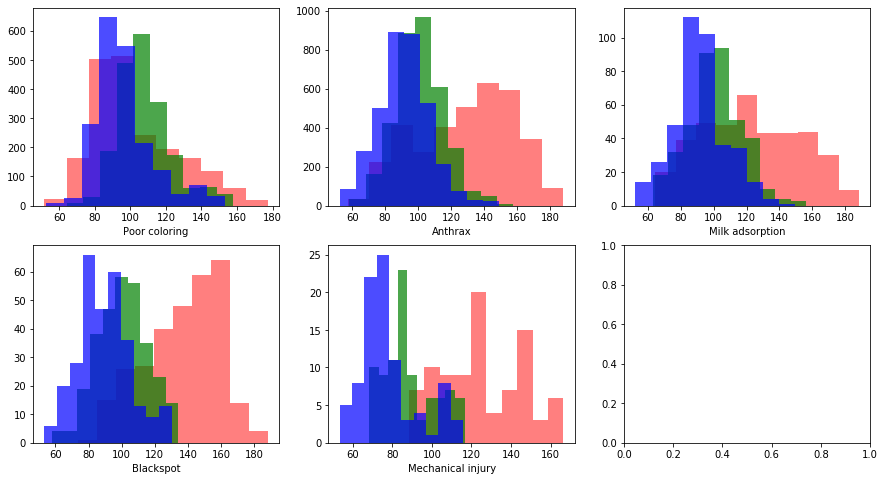

In [215]:
RGB = df.loc[:,['cat','ori_R','ori_G','ori_B']]
print(RGB[RGB['cat'] == 0].astype(float).describe())
print(RGB[RGB['cat'] == 1].astype(float).describe())
print(RGB[RGB['cat'] == 2].astype(float).describe())
print(RGB[RGB['cat'] == 3].astype(float).describe())
print(RGB[RGB['cat'] == 4].astype(float).describe())

fig, axs = plt.subplots(2,3, figsize = (15,8))

axs[0, 0].hist(df[df['cat'] == 0]['ori_R'], label = 'ori_R', alpha = 0.5, color = 'red')
axs[0, 0].hist(df[df['cat'] == 0]['ori_G'], label = 'ori_G', alpha = 0.7, color = 'green')
axs[0, 0].hist(df[df['cat'] == 0]['ori_B'], label = 'ori_B', alpha = 0.7, color = 'blue')
axs[0, 0].set(xlabel='Poor coloring')

axs[0, 1].hist(df[df['cat'] == 1]['ori_R'], label = 'ori_R', alpha = 0.5, color = 'red')
axs[0, 1].hist(df[df['cat'] == 1]['ori_G'], label = 'ori_G', alpha = 0.7, color = 'green')
axs[0, 1].hist(df[df['cat'] == 1]['ori_B'], label = 'ori_B', alpha = 0.7, color = 'blue')
axs[0, 1].set(xlabel='Anthrax')

axs[0, 2].hist(df[df['cat'] == 2]['ori_R'], label = 'ori_R', alpha = 0.5, color = 'red')
axs[0, 2].hist(df[df['cat'] == 2]['ori_G'], label = 'ori_G', alpha = 0.7, color = 'green')
axs[0, 2].hist(df[df['cat'] == 2]['ori_B'], label = 'ori_B', alpha = 0.7, color = 'blue')
axs[0, 2].set(xlabel='Milk adsorption')

axs[1, 0].hist(df[df['cat'] == 3]['ori_R'], label = 'ori_R', alpha = 0.5, color = 'red')
axs[1, 0].hist(df[df['cat'] == 3]['ori_G'], label = 'ori_G', alpha = 0.7, color = 'green')
axs[1, 0].hist(df[df['cat'] == 3]['ori_B'], label = 'ori_B', alpha = 0.7, color = 'blue')
axs[1, 0].set(xlabel='Blackspot')

axs[1, 1].hist(df[df['cat'] == 4]['ori_R'], label = 'ori_R', alpha = 0.5, color = 'red')
axs[1, 1].hist(df[df['cat'] == 4]['ori_G'], label = 'ori_G', alpha = 0.7, color = 'green')
axs[1, 1].hist(df[df['cat'] == 4]['ori_B'], label = 'ori_B', alpha = 0.7, color = 'blue')
axs[1, 1].set(xlabel='Mechanical injury')
plt.show()

### 不良缺陷處(crop) 

-----著色不佳----
          cat       crop_R       crop_G       crop_B
count  1997.0  1997.000000  1997.000000  1997.000000
mean      0.0   184.322617   141.192654   184.322617
std       0.0    41.445191    37.695558    41.445191
min       0.0    52.262899    25.464484    52.262899
25%       0.0   156.467944   115.507724   156.467944
50%       0.0   183.736462   138.872271   183.736462
75%       0.0   215.919277   163.857751   215.919277
max       0.0   254.250168   251.021197   254.250168
-----炭疽病----
          cat       crop_R       crop_G       crop_B
count  3504.0  3504.000000  3504.000000  3504.000000
mean      1.0   181.686977   106.543303   181.686977
std       0.0    41.741173    40.618449    41.741173
min       1.0    37.218072     9.803488    37.218072
25%       1.0   153.670028    78.290482   153.670028
50%       1.0   183.968722   103.883108   183.968722
75%       1.0   212.932741   133.020563   212.932741
max       1.0   253.938940   250.269886   253.938940
-----乳汁吸附----
     

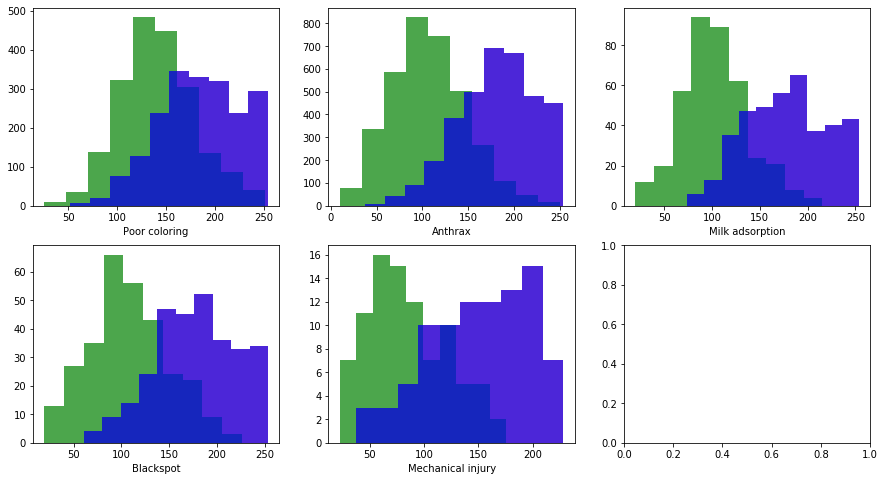

In [217]:
RGB = df.loc[:,['cat','crop_R','crop_G','crop_B']]
print("-----著色不佳----")
print(RGB[RGB['cat'] == 0].astype(float).describe())
print("-----炭疽病----")
print(RGB[RGB['cat'] == 1].astype(float).describe())
print("-----乳汁吸附----")
print(RGB[RGB['cat'] == 2].astype(float).describe())
print("-----黑斑病----")
print(RGB[RGB['cat'] == 3].astype(float).describe())
print("-----機械傷害----")
print(RGB[RGB['cat'] == 4].astype(float).describe())

fig, axs = plt.subplots(2,3, figsize = (15,8))

axs[0, 0].hist(df[df['cat'] == 0]['crop_R'], label = 'crop_R', alpha = 0.5, color = 'red')
axs[0, 0].hist(df[df['cat'] == 0]['crop_G'], label = 'crop_G', alpha = 0.7, color = 'green')
axs[0, 0].hist(df[df['cat'] == 0]['crop_B'], label = 'crop_B', alpha = 0.7, color = 'blue')
axs[0, 0].set(xlabel='Poor coloring')

axs[0, 1].hist(df[df['cat'] == 1]['crop_R'], label = 'crop_R', alpha = 0.5, color = 'red')
axs[0, 1].hist(df[df['cat'] == 1]['crop_G'], label = 'crop_G', alpha = 0.7, color = 'green')
axs[0, 1].hist(df[df['cat'] == 1]['crop_B'], label = 'crop_B', alpha = 0.7, color = 'blue')
axs[0, 1].set(xlabel='Anthrax')

axs[0, 2].hist(df[df['cat'] == 2]['crop_R'], label = 'crop_R', alpha = 0.5, color = 'red')
axs[0, 2].hist(df[df['cat'] == 2]['crop_G'], label = 'crop_G', alpha = 0.7, color = 'green')
axs[0, 2].hist(df[df['cat'] == 2]['crop_B'], label = 'crop_B', alpha = 0.7, color = 'blue')
axs[0, 2].set(xlabel='Milk adsorption')

axs[1, 0].hist(df[df['cat'] == 3]['crop_R'], label = 'crop_R', alpha = 0.5, color = 'red')
axs[1, 0].hist(df[df['cat'] == 3]['crop_G'], label = 'crop_G', alpha = 0.7, color = 'green')
axs[1, 0].hist(df[df['cat'] == 3]['crop_B'], label = 'crop_B', alpha = 0.7, color = 'blue')
axs[1, 0].set(xlabel='Blackspot')

axs[1, 1].hist(df[df['cat'] == 4]['crop_R'], label = 'crop_R', alpha = 0.5, color = 'red')
axs[1, 1].hist(df[df['cat'] == 4]['crop_G'], label = 'crop_G', alpha = 0.7, color = 'green')
axs[1, 1].hist(df[df['cat'] == 4]['crop_B'], label = 'crop_B', alpha = 0.7, color = 'blue')
axs[1, 1].set(xlabel='Mechanical injury')
plt.show()

# 原圖的Hara特徵

### 著色不佳、炭疽病

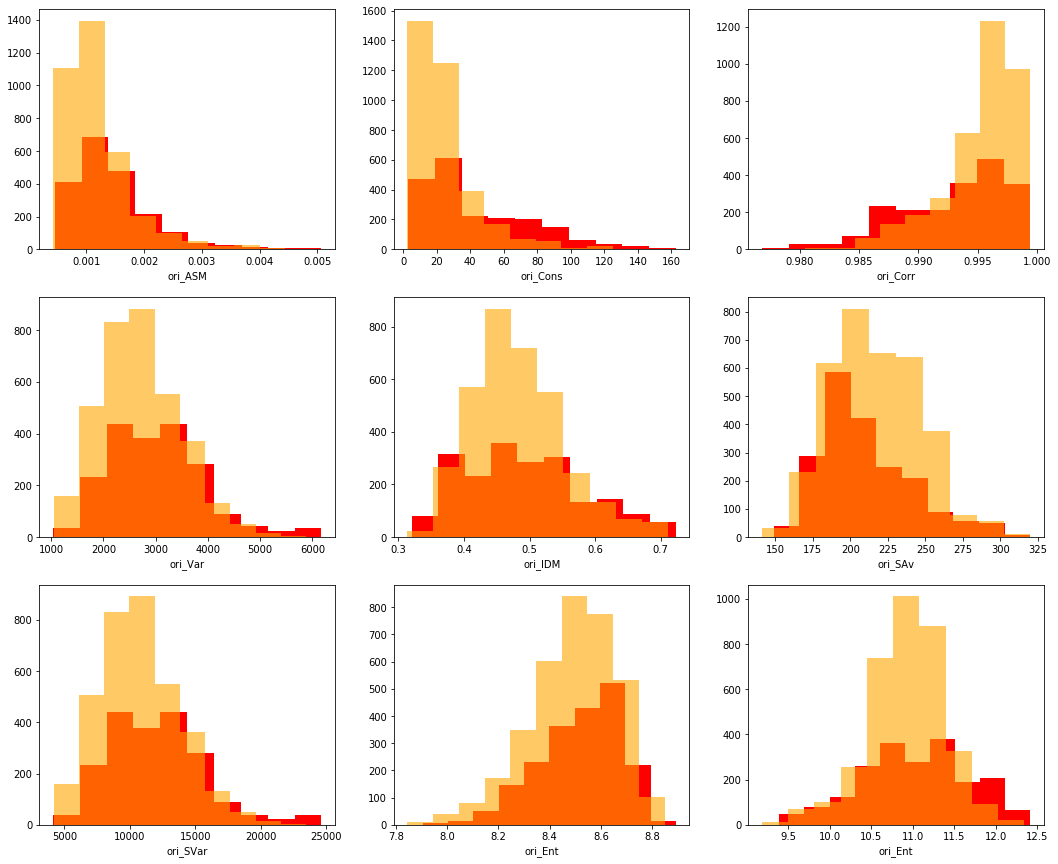

In [227]:
fig, axs = plt.subplots(3,3, figsize = (18,15))

axs[0, 0].hist(df[df['cat'] == 0]['ori_ASM'], label = 'Poor coloring', alpha = 1, color = 'red')
axs[0, 0].hist(df[df['cat'] == 1]['ori_ASM'], label = 'Anthrax', alpha = 0.6, color = 'orange')
axs[0, 0].set(xlabel='ori_ASM')

axs[0, 1].hist(df[df['cat'] == 0]['ori_Cons'], label = 'Poor coloring', alpha = 1, color = 'red')
axs[0, 1].hist(df[df['cat'] == 1]['ori_Cons'], label = 'Anthrax', alpha = 0.6, color = 'orange')
axs[0, 1].set(xlabel='ori_Cons')

axs[0, 2].hist(df[df['cat'] == 0]['ori_Corr'], label = 'Poor coloring', alpha = 1, color = 'red')
axs[0, 2].hist(df[df['cat'] == 1]['ori_Corr'], label = 'Anthrax', alpha = 0.6, color = 'orange')
axs[0, 2].set(xlabel='ori_Corr')

axs[1, 0].hist(df[df['cat'] == 0]['ori_Var'], label = 'Poor coloring', alpha = 1, color = 'red')
axs[1, 0].hist(df[df['cat'] == 1]['ori_Var'], label = 'Anthrax', alpha = 0.6, color = 'orange')
axs[1, 0].set(xlabel='ori_Var')

axs[1, 1].hist(df[df['cat'] == 0]['ori_IDM'], label = 'Poor coloring', alpha = 1, color = 'red')
axs[1, 1].hist(df[df['cat'] == 1]['ori_IDM'], label = 'Anthrax', alpha = 0.6, color = 'orange')
axs[1, 1].set(xlabel='ori_IDM')

axs[1, 2].hist(df[df['cat'] == 0]['ori_SAv'], label = 'Poor coloring', alpha = 1, color = 'red')
axs[1, 2].hist(df[df['cat'] == 1]['ori_SAv'], label = 'Anthrax', alpha = 0.6, color = 'orange')
axs[1, 2].set(xlabel='ori_SAv')

axs[2, 0].hist(df[df['cat'] == 0]['ori_SVar'], label = 'Poor coloring', alpha = 1, color = 'red')
axs[2, 0].hist(df[df['cat'] == 1]['ori_SVar'], label = 'Anthrax', alpha = 0.6, color = 'orange')
axs[2, 0].set(xlabel='ori_SVar')

axs[2, 1].hist(df[df['cat'] == 0]['ori_SEnt'], label = 'Poor coloring', alpha = 1, color = 'red')
axs[2, 1].hist(df[df['cat'] == 1]['ori_SEnt'], label = 'Anthrax', alpha = 0.6, color = 'orange')
axs[2, 1].set(xlabel='ori_Ent')

axs[2, 2].hist(df[df['cat'] == 0]['ori_Ent'], label = 'Poor coloring', alpha = 1, color = 'red')
axs[2, 2].hist(df[df['cat'] == 1]['ori_Ent'], label = 'Anthrax', alpha = 0.6, color = 'orange')
axs[2, 2].set(xlabel='ori_Ent')

plt.show()

### 乳汁吸附、黑斑病、機械傷害

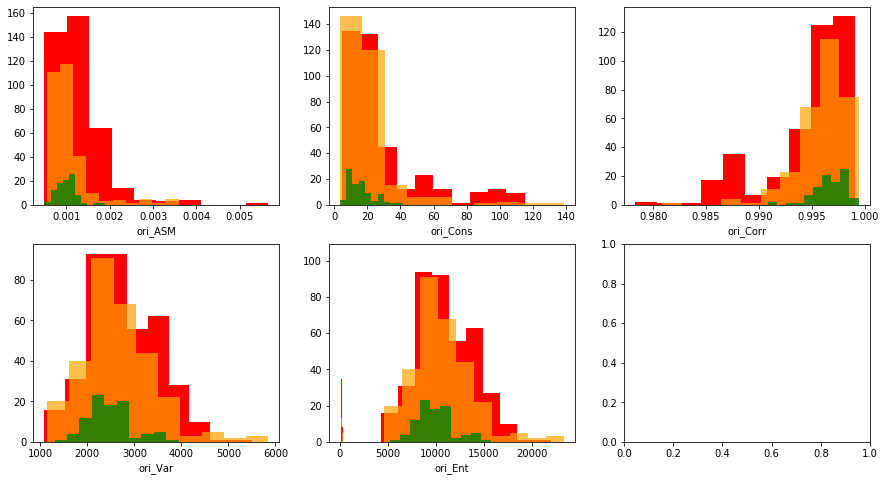

In [232]:
fig, axs = plt.subplots(2,3, figsize = (15,8))

axs[0, 0].hist(df[df['cat'] == 2]['ori_ASM'], label = 'Milk adsorption', alpha = 1, color = 'red')
axs[0, 0].hist(df[df['cat'] == 3]['ori_ASM'], label = 'Blackspot', alpha = 0.7, color = 'orange')
axs[0, 0].hist(df[df['cat'] == 4]['ori_ASM'], label = 'Mechanical injury', alpha = 0.8, color = 'green')
axs[0, 0].set(xlabel='ori_ASM')

axs[0, 1].hist(df[df['cat'] == 2]['ori_Cons'], label = 'Milk adsorption', alpha = 1, color = 'red')
axs[0, 1].hist(df[df['cat'] == 3]['ori_Cons'], label = 'Blackspot', alpha = 0.7, color = 'orange')
axs[0, 1].hist(df[df['cat'] == 4]['ori_Cons'], label = 'Mechanical injury', alpha = 0.8, color = 'green')
axs[0, 1].set(xlabel='ori_Cons')

axs[0, 2].hist(df[df['cat'] == 2]['ori_Corr'], label = 'Milk adsorption', alpha = 1, color = 'red')
axs[0, 2].hist(df[df['cat'] == 3]['ori_Corr'], label = 'Blackspot', alpha = 0.7, color = 'orange')
axs[0, 2].hist(df[df['cat'] == 4]['ori_Corr'], label = 'Mechanical injury', alpha = 0.8, color = 'green')
axs[0, 2].set(xlabel='ori_Corr')

axs[1, 0].hist(df[df['cat'] == 2]['ori_Var'], label = 'Milk adsorption', alpha = 1, color = 'red')
axs[1, 0].hist(df[df['cat'] == 3]['ori_Var'], label = 'Blackspot', alpha = 0.7, color = 'orange')
axs[1, 0].hist(df[df['cat'] == 4]['ori_Var'], label = 'Mechanical injury', alpha = 0.8, color = 'green')
axs[1, 0].set(xlabel='ori_Var')

axs[1, 1].hist(df[df['cat'] == 2]['ori_IDM'], label = 'Milk adsorption', alpha = 1, color = 'red')
axs[1, 1].hist(df[df['cat'] == 3]['ori_IDM'], label = 'Blackspot', alpha = 0.7, color = 'orange')
axs[1, 1].hist(df[df['cat'] == 4]['ori_IDM'], label = 'Mechanical injury', alpha = 0.8, color = 'green')
axs[1, 1].set(xlabel='ori_IDM')

axs[1, 1].hist(df[df['cat'] == 2]['ori_SAv'], label = 'Milk adsorption', alpha = 1, color = 'red')
axs[1, 1].hist(df[df['cat'] == 3]['ori_SAv'], label = 'Blackspot', alpha = 0.7, color = 'orange')
axs[1, 1].hist(df[df['cat'] == 4]['ori_SAv'], label = 'Mechanical injury', alpha = 0.8, color = 'green')
axs[1, 1].set(xlabel='ori_SAv')

axs[1, 1].hist(df[df['cat'] == 2]['ori_SVar'], label = 'Milk adsorption', alpha = 1, color = 'red')
axs[1, 1].hist(df[df['cat'] == 3]['ori_SVar'], label = 'Blackspot', alpha = 0.7, color = 'orange')
axs[1, 1].hist(df[df['cat'] == 4]['ori_SVar'], label = 'Mechanical injury', alpha = 0.8, color = 'green')
axs[1, 1].set(xlabel='ori_SVar')

axs[1, 1].hist(df[df['cat'] == 2]['ori_SEnt'], label = 'Milk adsorption', alpha = 1, color = 'red')
axs[1, 1].hist(df[df['cat'] == 3]['ori_SEnt'], label = 'Blackspot', alpha = 0.7, color = 'orange')
axs[1, 1].hist(df[df['cat'] == 4]['ori_SEnt'], label = 'Mechanical injury', alpha = 0.8, color = 'green')
axs[1, 1].set(xlabel='ori_SEnt')

axs[1, 1].hist(df[df['cat'] == 2]['ori_Ent'], label = 'Milk adsorption', alpha = 1, color = 'red')
axs[1, 1].hist(df[df['cat'] == 3]['ori_Ent'], label = 'Blackspot', alpha = 0.7, color = 'orange')
axs[1, 1].hist(df[df['cat'] == 4]['ori_Ent'], label = 'Mechanical injury', alpha = 0.8, color = 'green')
axs[1, 1].set(xlabel='ori_Ent')
plt.show()

### 敘述性統計

In [ ]:
Hara = df.loc[:,['cat','ori_ASM','ori_Cons','ori_Corr','ori_Var','ori_Ent']]

#平均、標準差、最小、最大等等
print(Hara[Hara['cat'] == 0].astype(float).describe())
#print(Hara[Hara['cat'] == 1].astype(float).describe())
#print(Hara[Hara['cat'] == 2].astype(float).describe())
#print(Hara[Hara['cat'] == 3].astype(float).describe())
#print(Hara[Hara['cat'] == 4].astype(float).describe())

#偏態
print(Hara[Hara['cat'] == 0].astype(float).skew())
#print(Hara[Hara['cat'] == 1].astype(float).skew())
#print(Hara[Hara['cat'] == 2].astype(float).skew())
#print(Hara[Hara['cat'] == 3].astype(float).skew())
#print(Hara[Hara['cat'] == 4].astype(float).skew())

#峰態
print(Hara[Hara['cat'] == 0].astype(float).kurt())
#print(Hara[Hara['cat'] == 1].astype(float).kurt())
#print(Hara[Hara['cat'] == 2].astype(float).kurt())
#print(Hara[Hara['cat'] == 3].astype(float).kurt())
#print(Hara[Hara['cat'] == 4].astype(float).kurt())

# 不良部位的Hara特徵

### 著色不佳、炭疽病

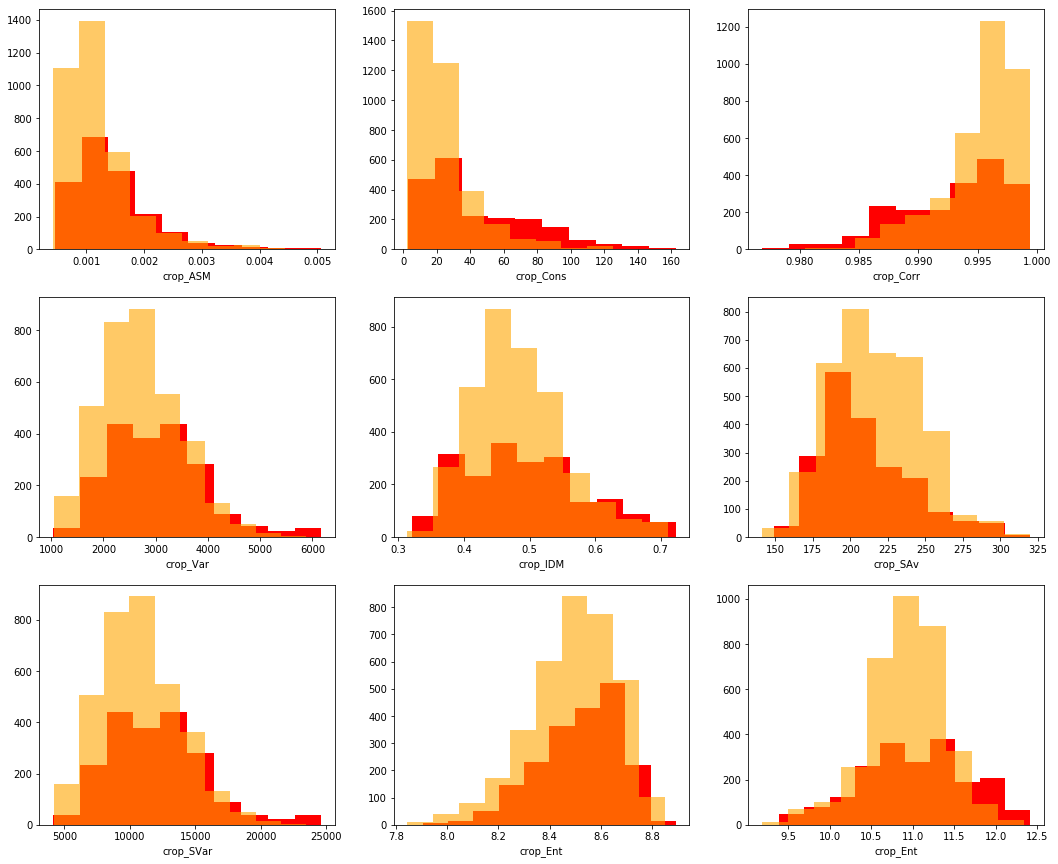

In [233]:
fig, axs = plt.subplots(3,3, figsize = (18,15))

axs[0, 0].hist(df[df['cat'] == 0]['crop_ASM'], label = 'Poor coloring', alpha = 1, color = 'red')
axs[0, 0].hist(df[df['cat'] == 1]['crop_ASM'], label = 'Anthrax', alpha = 0.6, color = 'orange')
axs[0, 0].set(xlabel='crop_ASM')

axs[0, 1].hist(df[df['cat'] == 0]['crop_Cons'], label = 'Poor coloring', alpha = 1, color = 'red')
axs[0, 1].hist(df[df['cat'] == 1]['crop_Cons'], label = 'Anthrax', alpha = 0.6, color = 'orange')
axs[0, 1].set(xlabel='crop_Cons')

axs[0, 2].hist(df[df['cat'] == 0]['crop_Corr'], label = 'Poor coloring', alpha = 1, color = 'red')
axs[0, 2].hist(df[df['cat'] == 1]['crop_Corr'], label = 'Anthrax', alpha = 0.6, color = 'orange')
axs[0, 2].set(xlabel='crop_Corr')

axs[1, 0].hist(df[df['cat'] == 0]['crop_Var'], label = 'Poor coloring', alpha = 1, color = 'red')
axs[1, 0].hist(df[df['cat'] == 1]['crop_Var'], label = 'Anthrax', alpha = 0.6, color = 'orange')
axs[1, 0].set(xlabel='crop_Var')

axs[1, 1].hist(df[df['cat'] == 0]['crop_IDM'], label = 'Poor coloring', alpha = 1, color = 'red')
axs[1, 1].hist(df[df['cat'] == 1]['crop_IDM'], label = 'Anthrax', alpha = 0.6, color = 'orange')
axs[1, 1].set(xlabel='crop_IDM')

axs[1, 2].hist(df[df['cat'] == 0]['crop_SAv'], label = 'Poor coloring', alpha = 1, color = 'red')
axs[1, 2].hist(df[df['cat'] == 1]['crop_SAv'], label = 'Anthrax', alpha = 0.6, color = 'orange')
axs[1, 2].set(xlabel='crop_SAv')

axs[2, 0].hist(df[df['cat'] == 0]['crop_SVar'], label = 'Poor coloring', alpha = 1, color = 'red')
axs[2, 0].hist(df[df['cat'] == 1]['crop_SVar'], label = 'Anthrax', alpha = 0.6, color = 'orange')
axs[2, 0].set(xlabel='crop_SVar')

axs[2, 1].hist(df[df['cat'] == 0]['crop_SEnt'], label = 'Poor coloring', alpha = 1, color = 'red')
axs[2, 1].hist(df[df['cat'] == 1]['crop_SEnt'], label = 'Anthrax', alpha = 0.6, color = 'orange')
axs[2, 1].set(xlabel='crop_Ent')

axs[2, 2].hist(df[df['cat'] == 0]['crop_Ent'], label = 'Poor coloring', alpha = 1, color = 'red')
axs[2, 2].hist(df[df['cat'] == 1]['crop_Ent'], label = 'Anthrax', alpha = 0.6, color = 'orange')
axs[2, 2].set(xlabel='crop_Ent')

plt.show()

### 乳汁吸附、黑斑病、機械傷害

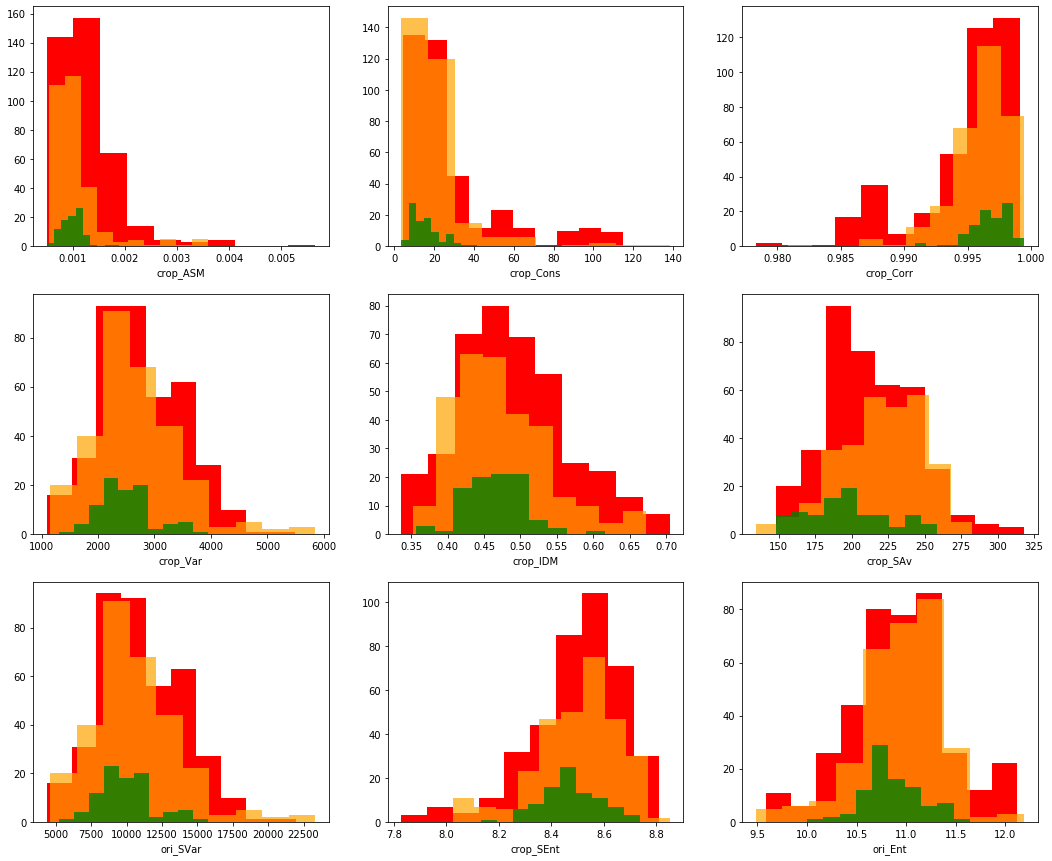

In [237]:
fig, axs = plt.subplots(3,3, figsize = (18,15))

axs[0, 0].hist(df[df['cat'] == 2]['crop_ASM'], label = 'Milk adsorption', alpha = 1, color = 'red')
axs[0, 0].hist(df[df['cat'] == 3]['crop_ASM'], label = 'Blackspot', alpha = 0.7, color = 'orange')
axs[0, 0].hist(df[df['cat'] == 4]['crop_ASM'], label = 'Mechanical injury', alpha = 0.8, color = 'green')
axs[0, 0].set(xlabel='crop_ASM')

axs[0, 1].hist(df[df['cat'] == 2]['crop_Cons'], label = 'Milk adsorption', alpha = 1, color = 'red')
axs[0, 1].hist(df[df['cat'] == 3]['crop_Cons'], label = 'Blackspot', alpha = 0.7, color = 'orange')
axs[0, 1].hist(df[df['cat'] == 4]['crop_Cons'], label = 'Mechanical injury', alpha = 0.8, color = 'green')
axs[0, 1].set(xlabel='crop_Cons')

axs[0, 2].hist(df[df['cat'] == 2]['crop_Corr'], label = 'Milk adsorption', alpha = 1, color = 'red')
axs[0, 2].hist(df[df['cat'] == 3]['crop_Corr'], label = 'Blackspot', alpha = 0.7, color = 'orange')
axs[0, 2].hist(df[df['cat'] == 4]['crop_Corr'], label = 'Mechanical injury', alpha = 0.8, color = 'green')
axs[0, 2].set(xlabel='crop_Corr')

axs[1, 0].hist(df[df['cat'] == 2]['crop_Var'], label = 'Milk adsorption', alpha = 1, color = 'red')
axs[1, 0].hist(df[df['cat'] == 3]['crop_Var'], label = 'Blackspot', alpha = 0.7, color = 'orange')
axs[1, 0].hist(df[df['cat'] == 4]['crop_Var'], label = 'Mechanical injury', alpha = 0.8, color = 'green')
axs[1, 0].set(xlabel='crop_Var')

axs[1, 1].hist(df[df['cat'] == 2]['crop_IDM'], label = 'Milk adsorption', alpha = 1, color = 'red')
axs[1, 1].hist(df[df['cat'] == 3]['crop_IDM'], label = 'Blackspot', alpha = 0.7, color = 'orange')
axs[1, 1].hist(df[df['cat'] == 4]['crop_IDM'], label = 'Mechanical injury', alpha = 0.8, color = 'green')
axs[1, 1].set(xlabel='crop_IDM')

axs[1, 2].hist(df[df['cat'] == 2]['crop_SAv'], label = 'Milk adsorption', alpha = 1, color = 'red')
axs[1, 2].hist(df[df['cat'] == 3]['crop_SAv'], label = 'Blackspot', alpha = 0.7, color = 'orange')
axs[1, 2].hist(df[df['cat'] == 4]['crop_SAv'], label = 'Mechanical injury', alpha = 0.8, color = 'green')
axs[1, 2].set(xlabel='crop_SAv')

axs[2, 0].hist(df[df['cat'] == 2]['crop_SVar'], label = 'Milk adsorption', alpha = 1, color = 'red')
axs[2, 0].hist(df[df['cat'] == 3]['crop_SVar'], label = 'Blackspot', alpha = 0.7, color = 'orange')
axs[2, 0].hist(df[df['cat'] == 4]['crop_SVar'], label = 'Mechanical injury', alpha = 0.8, color = 'green')
axs[2, 0].set(xlabel='ori_SVar')

axs[2, 1].hist(df[df['cat'] == 2]['crop_SEnt'], label = 'Milk adsorption', alpha = 1, color = 'red')
axs[2, 1].hist(df[df['cat'] == 3]['crop_SEnt'], label = 'Blackspot', alpha = 0.7, color = 'orange')
axs[2, 1].hist(df[df['cat'] == 4]['crop_SEnt'], label = 'Mechanical injury', alpha = 0.8, color = 'green')
axs[2, 1].set(xlabel='crop_SEnt')

axs[2, 2].hist(df[df['cat'] == 2]['ori_Ent'], label = 'Milk adsorption', alpha = 1, color = 'red')
axs[2, 2].hist(df[df['cat'] == 3]['ori_Ent'], label = 'Blackspot', alpha = 0.7, color = 'orange')
axs[2, 2].hist(df[df['cat'] == 4]['ori_Ent'], label = 'Mechanical injury', alpha = 0.8, color = 'green')
axs[2, 2].set(xlabel='ori_Ent')
plt.show()

# 將資料分為Train(60%)和Test(40%)
1.特徵值共有「32個」：'ori_R','ori_G', 'ori_B', 'crop_R', 'crop_G', 'crop_B','ori_ASM', 'ori_Cons',
       'ori_Corr', 'ori_Var', 'ori_IDM', 'ori_SAv', 'ori_SVar', 'ori_SEnt',
       'ori_Ent', 'ori_DVar', 'ori_DEnt', 'ori_IMC1', 'ori_IMC2', 'crop_ASM',
       'crop_Cons', 'crop_Corr', 'crop_Var', 'crop_IDM', 'crop_SAv',
       'crop_SVar', 'crop_SEnt', 'crop_Ent', 'crop_DVar', 'crop_DEnt',
       'crop_IMC1', 'crop_IMC2'

In [20]:
from sklearn.model_selection import train_test_split

#random_state為隨機數的種子，為了產生同一組隨機數
X = df[['ori_G', 'ori_B', 'crop_R','ori_ASM', 'ori_Cons',
        'ori_Corr', 'ori_Var', 'ori_IDM', 'ori_SAv', 'ori_SVar', 'ori_SEnt',
        'ori_Ent', 'ori_DVar', 'ori_DEnt', 'ori_IMC1', 'ori_IMC2','crop_R', 
        'crop_G', 'crop_B', 'crop_ASM', 'crop_Cons', 'crop_Corr', 'crop_Var',
        'crop_IDM', 'crop_SAv', 'crop_SVar', 'crop_SEnt', 'crop_Ent', 'crop_DVar',
        'crop_DEnt', 'crop_IMC1', 'crop_IMC2']]


Y = df[['cat']]

train_X,test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.4, random_state = 0)

# 資料縮放

In [21]:
from sklearn.preprocessing import MinMaxScaler 

sc = MinMaxScaler()

train_X = sc.fit_transform(train_X)
#train_Y = sc.fit_transform(train_Y)

test_X = sc.fit_transform(test_X)
#test_Y = sc.fit_transform(test_Y)

# Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

ln = LinearRegression()
ln.fit(train_X, train_Y)

print('Intercept: \n', ln.intercept_)
print('Coefficients: \n', ln.coef_)

print("Train Accurancy of Linear:{}".format(ln.score(train_X, train_Y)))
print("Test Accurancy of Linear:{}".format(ln.score(test_X, test_Y)))

Intercept: 
 [4.65298728]
Coefficients: 
 [[-1.33429486e+00 -1.69357979e-01  5.00074582e+10 -3.95309468e+10
   1.03552514e+10  6.00578472e+10  1.02225541e+12  5.71842060e+09
   1.05525929e+10 -1.04399471e+12  2.60460807e+09  2.44548014e+09
   3.44099668e+09 -1.14478006e+10  2.68041080e+08 -5.90878085e+09
  -2.50037291e+10 -1.13486911e+00 -2.50037291e+10  3.95309468e+10
  -2.66308668e+10 -6.00578472e+10  1.06176792e+12 -5.71842060e+09
  -1.05525929e+10 -1.03434884e+12 -2.60460808e+09 -2.44548014e+09
  -3.44099668e+09  1.14478006e+10 -2.68041086e+08  5.90878085e+09]]
Train Accurancy of Linear:0.22567818061780065
Test Accurancy of Linear:-8.106474604971776e+16


# Ridge和Lasso

In [23]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha = 1)
lasso = Lasso(alpha = 1)
ridge.fit(train_X, train_Y)
lasso.fit(train_X, train_Y)

ridge.predict(train_X)
lasso.predict(train_X)

#模型精確度
print("Train Accurancy of Ridge:{}".format(ridge.score(train_X, train_Y)))
print("Test Accurancy of Ridge:{}".format(ridge.score(test_X, test_Y)))

print("Accurancy of Lasso:{}".format(lasso.score(train_X, train_Y)))
print("Accurancy of Lasso:{}".format(lasso.score(test_X, test_Y)))

Train Accurancy of Ridge:0.22488372739442297
Test Accurancy of Ridge:0.22007200495380352
Accurancy of Lasso:0.0
Accurancy of Lasso:-0.0006849514455042892


# SVM

In [24]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear',C = 3, gamma='auto')
svm.fit(train_X, train_Y.astype('int'))

print("Train Accurancy of SVM:{}".format(svm.score(train_X, train_Y.astype('int'))))
print("Test Accurancy of SVM:{}".format(svm.score(test_X, test_Y.astype('int'))))

C:\Users\tsaiy\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accurancy of SVM:0.7133757961783439
Test Accurancy of SVM:0.7181528662420382


# SVM預測結果

In [50]:
y_true = train_Y
y_pred = svm.predict(train_X)

y_true = y_true.to_numpy()
print('*****the following is true data*****')

#print(len(y_true))
print(len(y_true[y_true == 0])) #著色不佳
print(len(y_true[y_true == 1])) #炭疽病
print(len(y_true[y_true == 2])) #乳汁吸附
print(len(y_true[y_true == 3])) #黑斑病
print(len(y_true[y_true == 4])) #機械傷害

print('*****the following is predict data*****')
#print(len(y_pred))
print(len(y_pred[y_pred == 0]))
print(len(y_pred[y_pred == 1]))
print(len(y_pred[y_pred == 2]))
print(len(y_pred[y_pred == 3]))
print(len(y_pred[y_pred == 4]))

*****the following is true data*****
1191
2100
235
182
60
*****the following is predict data*****
1258
2510
0
0
0


# Random Forest
https://ithelp.ithome.com.tw/articles/10206242

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()

#通過每個估計器擬合80％的訓練點
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)

bag.fit(train_X, train_Y.astype('int'))
print("Train Accurancy of Random Forest:{}".format(bag.score(train_X, train_Y.astype('int'))))
print("Test Accurancy of Random Forest:{}".format(bag.score(test_X, test_Y.astype('int'))))

C:\Users\tsaiy\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accurancy of Random Forest:0.9994692144373672
Test Accurancy of Random Forest:0.7368630573248408


# Random Forest預測結果
1.由下面的觀察可以發現，random forest不太能區分乳汁吸附、黑斑病、機械傷害

2.主要原因由下面的柱狀圖可發現，乳汁吸附、黑斑病、機械傷害這三種特徵的資料過少

*****the following is true data*****
806
1404
156
116
30
*****the following is predict data*****
766
1714
16
12
4


<BarContainer object of 5 artists>

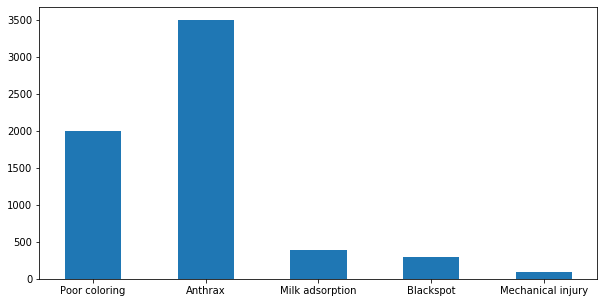

In [47]:
y_true = test_Y
y_pred = bag.predict(test_X)

y_true = y_true.to_numpy()
print('*****the following is true data*****')

#print(len(y_true))
print(len(y_true[y_true == 0])) #著色不佳
print(len(y_true[y_true == 1])) #炭疽病
print(len(y_true[y_true == 2])) #乳汁吸附
print(len(y_true[y_true == 3])) #黑斑病
print(len(y_true[y_true == 4])) #機械傷害

print('*****the following is predict data*****')
#print(len(y_pred))
print(len(y_pred[y_pred == 0]))
print(len(y_pred[y_pred == 1]))
print(len(y_pred[y_pred == 2]))
print(len(y_pred[y_pred == 3]))
print(len(y_pred[y_pred == 4]))

fig, axs = plt.subplots(1, figsize = (10,5))
plt.bar(x = ['Poor coloring','Anthrax','Milk adsorption','Blackspot','Mechanical injury'],
        height = [len(df[df['cat'] == 0]),len(df[df['cat'] == 1]),len(df[df['cat'] == 2]),len(df[df['cat'] == 3]),len(df[df['cat'] == 4])],
        width = 0.5)

In [166]:
type(y_pred)

numpy.ndarray

# Cross Validation

In [212]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(bag, train_X,  train_Y.astype('int'), cv=5, scoring='accuracy') #cv = 5代表分成5組
print(scores)
print(scores.mean())

C:\Users\tsaiy\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tsaiy\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tsaiy\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tsaiy\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[0.71087533 0.72546419 0.69761273 0.71580345 0.73837981]
0.7176271043148361


# Test Area

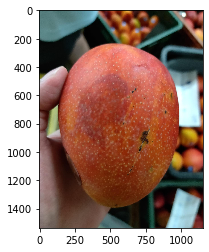

In [16]:
test_picture = cv2.cvtColor(df.loc[0,'ORIGINAL'], cv2.COLOR_BGR2RGB)
plt.imshow(test_picture)

# 增強對比 & erode

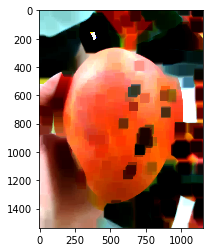

In [17]:
img = cv2.imread("C:/Users/tsaiy/MyPython/AIMango/C2_TrainDev/Dev/26519.jpg")
test_picture = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
I = test_picture
a = 2     #表示放大的倍數，通常在0~3之間，大於1為增加對比
b = -10   #用來調節亮度，大於0為調高亮度
O = I * float(a) + b
O[O > 255] = 255
O = np.round(O)
O = O.astype(np.uint8)
test_picture = O

plt.figure(1) #建一個畫布

#plt.subplot(231) #將畫布分成1*3個部分，將第一張子圖放在第一個位置
#plt.imshow(test_picture)


#擴散
#test = cv2.dilate(test_picture, None, iterations =36)
#plt.subplot(232) #將畫布分成1*3個部分，將第一張子圖放在第二個位置
#plt.imshow(test)

#侵蝕
test_erode = cv2.erode(test_picture, None, iterations =30)
#plt.subplot(233) #將畫布分成1*3個部分，將第一張子圖放在第三個位置
plt.imshow(test_erode)

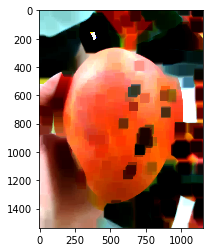

In [20]:
test_erode_d = cv2.dilate(test_erode, None, iterations =0)
plt.imshow(test_erode_d)

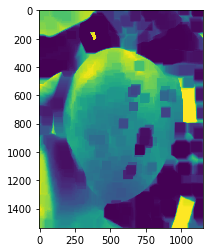

In [21]:
test_erode_d_g = cv2.cvtColor(test_erode_d, cv2.COLOR_RGB2GRAY) 
plt.imshow(test_erode_d_g)

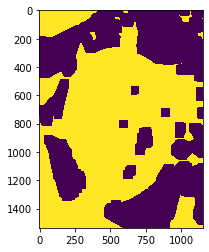

In [22]:
test_erode_d_g_b = cv2.threshold(test_erode_d_g,60,255,cv2.THRESH_BINARY)[1]
plt.imshow(test_erode_d_g_b)

# grabcut

In [ ]:
image_rgb = test_erode 
rectangle = (0, 0, image_rgb.shape[0], image_rgb.shape[1])

# Create initial mask
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Run grabCut
cv2.grabCut(image_rgb, # Our image
            mask, # The Mask
            rectangle, # Our rectangle
            bgdModel, # Temporary array for background
            fgdModel, # Temporary array for background
            5, # Number of iterations
            cv2.GC_INIT_WITH_RECT) # Initiative using our rectangle

# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# Multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

plt.imshow(image_rgb_nobg), plt.axis("off")

In [ ]:
blurred = cv2.GaussianBlur(test_erode_d_g_b, (5, 5), 0)
img = cv2.Canny(blurred, 50, 200)

#threshold1和2是用來區分strong edge和weak edge，範圍都是0~255。通常選擇thres2/thres1 = 0.33~0.50
#threshold1 = 50
#threshold2 = 100
#edges = cv2.Canny(img, threshold1, threshold2) #輸入的
plt.imshow(img,cmap = 'gray')

# Canny Edge

https://medium.com/@pomelyu5199/canny-edge-detector-%E5%AF%A6%E4%BD%9C-opencv-f7d1a0a57d19

In [ ]:
#圖要是「灰階」
gray = df.loc[0,'Gray']

#進行降噪處理
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
img = cv2.Canny(blurred, 40, 110)

#threshold1和2是用來區分strong edge和weak edge，範圍都是0~255。通常選擇thres2/thres1 = 0.33~0.50
threshold1 = 50
threshold2 = 100
edges = cv2.Canny(img, threshold1, threshold2) #輸入的

plt.subplot(231),plt.imshow(gray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(232),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

edges_2 = cv2.dilate(edges, None, iterations =100)
plt.subplot(233),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image after erode'), plt.xticks([]), plt.yticks([])

plt.subplot(234),plt.imshow(gray - 100*edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

# Contour

https://chtseng.wordpress.com/2016/12/05/opencv-contour%E8%BC%AA%E5%BB%93/

In [54]:
#26519.jpg
import imutils

def is_contour_bad(c):
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    # the contour is 'bad' if it is not a rectangle
    
    return not len(approx) == 4

img = cv2.imread("C:/Users/tsaiy/MyPython/AIMango/test.jpg")

original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #轉RGB
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY) #轉灰階
edged = cv2.Canny(gray, 50, 100) #canny

cnts, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

cnts = imutils.grab_contours(contours)
mask = np.ones(img.shape[:2], dtype="uint8") * 255

#con = cv2.drawContours(original, contours, -1, (0, 255, 0), 2)


#loop over the contours
for c in cnts:
    # if the contour is bad, draw it on the mask
    if is_contour_bad(c):
        cv2.drawContours(mask, [c], -1, 0, -1)
    
# remove the contours from the image and show the resulting images
img = cv2.bitwise_and(img, img, mask=mask)
cv2.imshow("Mask", mask)
cv2.imshow("After", img)
cv2.waitKey(0)

-1

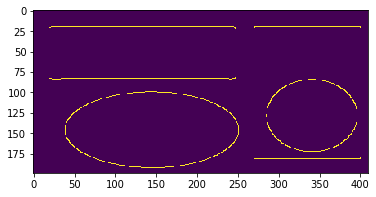

In [55]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 20, 120)

plt.imshow(edged)



# http://www.learningaboutelectronics.com/Articles/How-to-crop-an-object-in-an-image-in-Python-OpenCV.php

In [56]:
for (i,c) in enumerate(cnts):
    x,y,w,h= cv2.boundingRect(c)
    
    cropped_contour= original[y:y+h, x:x+w]
    image_name= "output_shape_number_" + str(i+1) + ".jpg"
    cv2.imwrite(image_name, cropped_contour)
    readimage= cv2.imread(image_name)
    cv2.imshow('Image', readimage)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()